In [7]:
from scr.serving import SceneRecognitionServing

# create scene recognition serving
src_serving = SceneRecognitionServing(k_similar = 2)

/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_36.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_34.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_30.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_31.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_32.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_38.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_37.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_40.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_33.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scene/16_39.jpg
/root/data/new_restaurant2/16/scene/16_36.jpg /root/data/new_restaurant2/16/scen

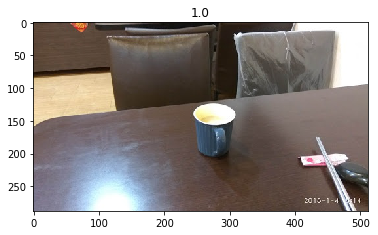

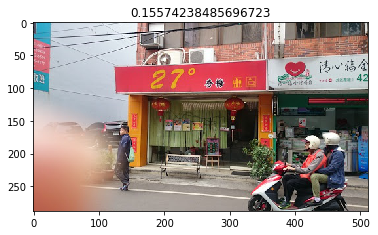

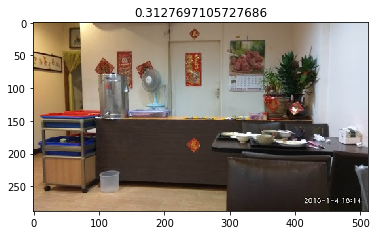

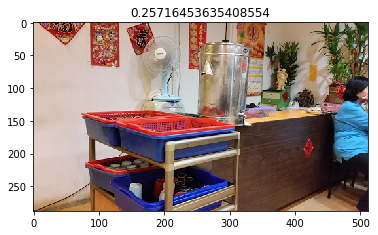

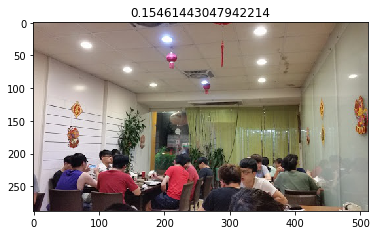

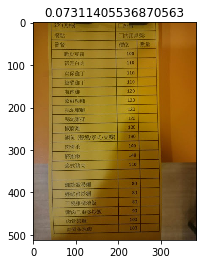

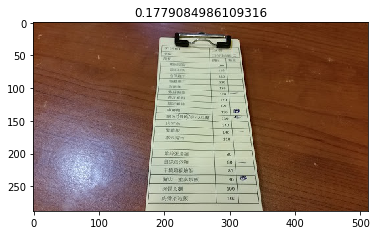

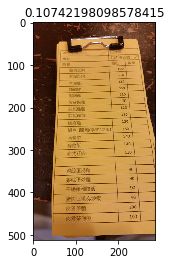

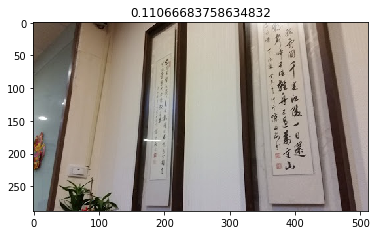

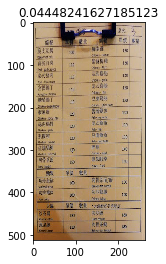

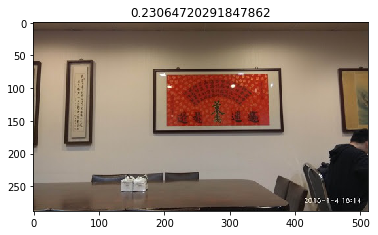

In [4]:
"""
<data_root>
    <scene 1>
        <scene>
        <people>
        <food>
        <filtered_scene>
            <similar>
            <notsimilar>
    <scene 2>

"""
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_root = '/root/data/new_restaurant2/'
for scene_name in os.listdir(data_root):
    scene_root = os.path.join(data_root,scene_name)
    scene_dir = os.path.join(scene_root,'scene')
    
    img_list = []
    for img_name in os.listdir(scene_dir):
        img_path = os.path.join(scene_dir,img_name)
        img_list.append(img_path)
    if len(img_list)<3:
        continue
    dist_metrics = src_serving.distance_metrics(img_list)
    
#     fig=plt.figure(figsize=(10, 50))
#     columns = len(img_list)
#     rows = len(img_list)
    
    for row ,row_path in enumerate(img_list):
        for col,col_path in enumerate(img_list):
            print(row_path,col_path)
            row_img=mpimg.imread(row_path)
            col_img=mpimg.imread(col_path)
            dist = dist_metrics[row][col]
            
#             plt.imshow(row_img)
            plt.figure()
            plt.title('{}'.format(dist))
            plt.imshow(col_img)
        break
    
    break

In [8]:
"""
<data_root>
    <scene 1>
        <scene>
        <people>
        <food>
        <filtered_scene>
            <similar>
            <notsimilar>
    <scene 2>

"""
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tqdm import tqdm

from shutil import copyfile

data_root = '/root/data/new_restaurant/'
for scene_name in tqdm(os.listdir(data_root)):
    scene_root = os.path.join(data_root,scene_name)
    
    scene_dir = os.path.join(scene_root,'scene')
    if not os.path.exists(scene_dir):
        continue
    
    img_list = []
    for img_name in os.listdir(scene_dir):
        img_path = os.path.join(scene_dir,img_name)
        img_list.append(img_path)
    if len(img_list)<4:
        continue
    dist_metrics = src_serving.distance_metrics(img_list)
    similar_indexes = src_serving.filter(dist_metrics,thresh = 0.3)
    
    for i in range(len(img_list)):
        img_path = img_list[i]
        if i in similar_indexes:
            out_path = img_path.replace('/scene/','/filtered_scene/similar/')
        else:
            out_path = img_path.replace('/scene/','/filtered_scene/notsimilar/')
        out_dir = out_path.replace(img_path.split('/')[-1],'')
        if not os.path.exists(out_dir):
            os.makedirs(out_dir)
        copyfile(img_path, out_path)


100%|██████████| 111/111 [03:38<00:00,  2.24s/it]
